In [1]:
import cv2
import os
from PIL import Image
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt

**Detecting Face on Single Image**

1/1 [==============================] - 0s 110ms/step


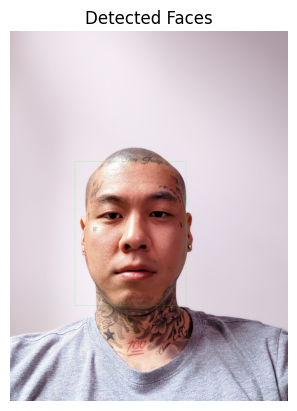

In [2]:
image_path = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst-e_data\\subject_0\\PXL_20220922_132845778.PORTRAIT.jpg'
# image_path = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_resized\\1_PXL_20220922_163158577.jpg'

destination_directory = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst_faces'
# destination_directory = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_faces'

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# face detector
detector = MTCNN()
faces = detector.detect_faces(image)

# bounding box
for face in faces:
    bounding_box = face['box']
    cv2.rectangle(
        image_rgb,
        (bounding_box[0], bounding_box[1]),
        (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
        (0, 255, 0),  # Rectangle color
        1  # Rectangle Thickness
    )

plt.imshow(image_rgb)
plt.axis('off')  
plt.title('Detected Faces')
plt.show()

**Extracting All Face to seperate Folder**

In [7]:
source_directory = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst_faces_resized' #change this to resized folder directory
# source_directory = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_resized'

destination_directory = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst_faces'
# destination_directory = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_faces'

# destination Folder 
os.makedirs(destination_directory, exist_ok=True)

detector = MTCNN()

for filename in os.listdir(source_directory):
    image_path = os.path.join(source_directory, filename)

    # Checking if file is an image 
    if os.path.isfile(image_path) and any(image_path.lower().endswith(ext) for ext in ['.jpg', '.jpeg', '.png']):
        image = cv2.imread(image_path)

        # Detect faces
        faces = detector.detect_faces(image)

        # Face to folder extraction
        if len(faces) > 0:
            largest_face = max(faces, key=lambda f: f['box'][2] * f['box'][3])
            x, y, w, h = largest_face['box']

            min_face_size = 30
            if w > min_face_size and h > min_face_size:
                face = image[y:y + h, x:x + w]

                extracted_face_filename = f'{os.path.splitext(filename)[0]}.jpg'
                extracted_face_path = os.path.join(destination_directory, extracted_face_filename)

                cv2.imwrite(extracted_face_path, face)
            else:
                print(f"Face in {filename} is too small and will be skipped.")
        else:
            
            print(f"No face detected in {filename}.")

print("Face extraction complete!")


Face extraction complete!


Resizing Face Images 

In [8]:
def resize_images(input_folder, output_folder, target_size):
    os.makedirs(output_folder, exist_ok=True)
 
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            try:
                image_path = os.path.join(input_folder, filename)
                with Image.open(image_path) as img:

                    # Image resizing
                    resized_img = img.resize(target_size, Image.LANCZOS)

                    output_path = os.path.join(output_folder, filename)
                    resized_img.save(output_path)
                    print(f"Resized and saved: {filename}")
            except Exception as e:
                print(f"Error resizing {filename}: {e}")

if __name__ == "__main__":
    # input_folder = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_faces'
    # output_folder = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_faces_resized'
    input_folder = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst_faces\\mst_faces'
    output_folder = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst_faces_resized'
    
    target_size = (224, 224)  # (width, height)
    
    resize_images(input_folder, output_folder, target_size)

Resized and saved: 10_PXL_20220922_175138290.jpg
Resized and saved: 10_PXL_20220922_175140560.jpg
Resized and saved: 10_PXL_20220922_175142212.jpg
Resized and saved: 10_PXL_20220922_175145715.jpg
Resized and saved: 10_PXL_20220922_175149121.jpg
Resized and saved: 10_PXL_20220922_175151358.jpg
Resized and saved: 10_PXL_20220922_175152817.jpg
Resized and saved: 10_PXL_20220922_175154352.jpg
Resized and saved: 10_PXL_20220922_175155744.jpg
Resized and saved: 10_PXL_20220922_175157945.jpg
Resized and saved: 10_PXL_20220922_175159465.jpg
Resized and saved: 10_PXL_20220922_175201134.jpg
Resized and saved: 10_PXL_20220922_175203683.jpg
Resized and saved: 10_PXL_20220922_175205602.jpg
Resized and saved: 10_PXL_20220922_175210525.jpg
Resized and saved: 10_PXL_20220922_175212910.jpg
Resized and saved: 10_PXL_20220922_175213980.jpg
Resized and saved: 10_PXL_20220922_175216751.jpg
Resized and saved: 10_PXL_20220922_175218550.jpg
Resized and saved: 10_PXL_20220922_175222824.jpg
Resized and saved: 1